<a href="https://colab.research.google.com/github/dzurel/E-Sports/blob/master/LoL2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **League of Legends World Championship 2019**
This notebook is made to make exploration on esports in League of Legends World Championship.

### Importing libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)

### Reading the Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dzurel/E-Sports/master/2019-summer-match-data-OraclesElixir-2019-11-10.csv")
df.head()

,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,herald,heraldtime,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1070340.0,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1.0,9.19,1.0,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0.0,0.0,4.0,4.0,7.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.879983,0.000000,0.037688,1.092965,0.0,9.717567,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,13.588567,0.0,0.0,1.0,10.0,0.0,23.779817,0.0,1.0,11588.0,436.733668,0.31206743328037057,0.2068443834548889,11.0,0.414573,0.105769,4.0,0.150754,4.0,6.0,,,8407.0,184.059799,8300.0,-0.151448,180.0,8.0,4.0,1.0,7.085427,3078.0,3440.0,-362.0,4670.0,5468.0,-798.0,4530.0,5051.0,-521.0,76.0,90.0,-14.0,116.0,122.0,-6.0
1,1070340.0,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1.0,9.19,2.0,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0.0,1.0,4.0,5.0,7.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.879983,0.037688,0.263819,1.092965,1.0,9.717567,1.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,13.588567,0.0,0.0,1.0,10.0,0.0,23.779817,0.0,1.0,7925.0,298.680905,0.2134220235370156,0.16686234149068638,24.0,0.904523,0.230769,8.0,0.301508,11.0,13.0,,,7463.0,148.481910,7360.0,-0.296789,35.0,96.0,76.0,0.0,4.937186,3684.0,4055.0,-371.0,4912.0,6278.0,-1366.0,3679.0,3928.0,-249.0,60.0,64.0,-4.0,88.0,105.0,-17.0
2,1070340.0,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1.0,9.19,3.0,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0.0,1.0,5.0,6.0,7.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.879983,0.037688,0.113065,1.092965,0.0,9.717567,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,13.588567,0.0,0.0,1.0,10.0,0.0,23.779817,0.0,1.0,7557.0,284.811558,0.20351170118223683,0.21010563052188422,13.0,0.489950,0.125000,1.0,0.037688,6.0,7.0,,,8484.0,186.961809,7700.0,-0.281729,186.0,6.0,4.0,0.0,7.236181,3926.0,3569.0,357.0,5487.0,6116.0,-629.0,4751.0,4533.0,218.0,88.0,85.0,3.0,131.0,150.0,-19.0
3,1070340.0,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1.0,9.19,4.0,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0.0,3.0,4.0,1.0,7.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.879983,0.113065,0.414573,1.092965,0.0,9.717567,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,13.588567,0.0,0.0,1.0,10.0,0.0,23.779817,0.0,1.0,7369.0,277.726131,0.1984488191096868,0.30074288666954674,9.0,0.339196,0.086538,7.0,0.263819,3.0,4.0,,,10624.0,267.615075,10150.0,-0.215385,219.0,20.0,20.0,0.0,9.007538,3579.0,3969.0,-390.0,5313.0,7142.0,-1829.0,3526.0,3532.0,-6.0,87.0,76.0,11.0,119.0,134.0,-15.0
4,1070340.0,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1.0,9.19,5.0,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0.0,2.0,5.0,2.0,7.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.879983,0.075377,0.000000,1.092965,0.0,9.717567,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,13.588567,0.0,0.0,1.0,10.0,0.0,23.779817,0.0,1.0,2694.0,101.532663,0.07255002289069022,0.11544475786299374,47.0,1.771357,0.451923,8

We have 98 columns. Teams and players   are in the same dataframe, they need to be seperated.Let's check the correlation and try to find what are the most effective things to do if one wants to win LoL games. Then we start with teams then players. 

In [3]:
rc = df.corr()
rc["result"].sort_values(ascending=False).head(10)


result                1.000000
teamtowerkills        0.894523
fbaron                0.756522
teambaronkills        0.696607
teamdragkills         0.623822
teamkills             0.614660
firsttothreetowers    0.613445
gspd                  0.521715
firstmidouter         0.512605
ft                    0.394958
Name: result, dtype: float64

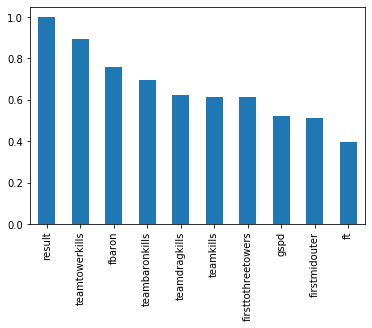

In [4]:
rc["result"].sort_values(ascending=False).head(10).plot(kind="bar")

## **How to Win a LoL Game?**
So the correlation table above shows that, if you want to win a game, focus the kill order below:
- 1- Kill the most towers(ok obviously if u kill all towers, you will win)
- 2- Kill the first baron(76% more chance to win)
- 3- Kill the most barons
- 4- Kill the most dragons
- 5- Kill the most enemy(killing the baron and dragons are more important than killing more enemies)
- 6- Kill three towers first
- 7- Kill the outer mid tower before they kill yours.
- 8- Kill the first tower.

For example: If you are playing a jungle, you need to focus killing the dragon first, then gang and kill a tower(mid if possible) and another dragon, then focusing on killing all 3 outer towers while trying to gang and if you can manage to kill the first baron, you won the game! Don't focus on ganging a lot, this reciepe is written by the bests.

In [0]:
teamdf = df.loc[df['position']=='Team',:]

In [0]:
playersdf = df.loc[df['position']!='Team',:]

In [7]:
print(int((teamdf.shape[0]/2)),'matches played')

119 matches played


Bans are seperated as 5 bans so they need to be melted into one ban column.

In [8]:
bans = teamdf[['ban1','ban2','ban3','ban4','ban5']].melt()
bans.head()

,variable,value
0,ban1,Qiyana
1,ban1,Heimerdinger
2,ban1,Syndra
3,ban1,Pantheon
4,ban1,Qiyana


Now let's see what is the most banned champions

In [9]:
top5bans = bans['value'].value_counts().nlargest(5)
for i in range (0,top5bans.shape[0]):
    print(top5bans.index[i],'was banned',top5bans[i],'times, which is',str("%.2f" %((top5bans[i]/119)*100))+'% of the matches.')

Pantheon was banned 118 times, which is 99.16% of the matches.
Qiyana was banned 86 times, which is 72.27% of the matches.
Syndra was banned 66 times, which is 55.46% of the matches.
Renekton was banned 61 times, which is 51.26% of the matches.
Akali was banned 54 times, which is 45.38% of the matches.


In [10]:
top5picks = playersdf['champion'].value_counts().nlargest(5)
for i in range (0,top5picks.shape[0]):
    print(top5picks.index[i],'was picked',top5picks[i],'times, which is',str("%.2f" %((top5picks[i]/119)*100))+'% of the matches.')

Kai'Sa was picked 71 times, which is 59.66% of the matches.
Lee Sin was picked 57 times, which is 47.90% of the matches.
Xayah was picked 56 times, which is 47.06% of the matches.
Nautilus was picked 52 times, which is 43.70% of the matches.
Gragas was picked 49 times, which is 41.18% of the matches.


In [0]:
top = playersdf.loc[playersdf['position']=='Top']
mid = playersdf.loc[playersdf['position']=='Middle']
adc = playersdf.loc[playersdf['position']=='ADC']
support = playersdf.loc[playersdf['position']=='Support']
jungle = playersdf.loc[playersdf['position']=='Jungle']

Top 5 picked Top champions:


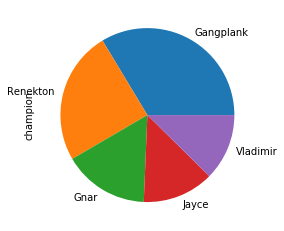

In [44]:
print('Top 5 picked Top champions:')
top['champion'].value_counts().nlargest(5).plot(kind="pie")

Top 5 picked Mid champions:


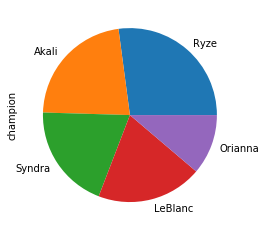

In [45]:
print('Top 5 picked Mid champions:')
mid['champion'].value_counts().nlargest(5).plot(kind="pie")

Top 5 picked ADC champions:


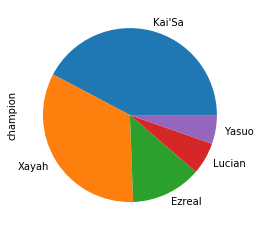

In [46]:
print('Top 5 picked ADC champions:')
adc['champion'].value_counts().nlargest(5).plot(kind="pie")

Top 5 picked Support champions:


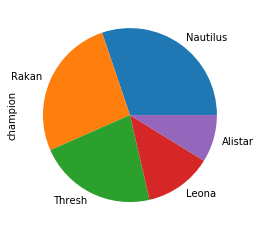

In [47]:
print('Top 5 picked Support champions:')
support['champion'].value_counts().nlargest(5).plot(kind="pie")

Top 5 picked Jungle champions:


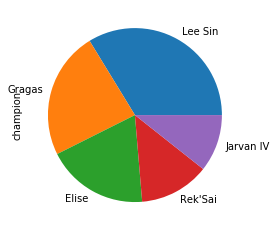

In [48]:
print('Top 5 picked Jungle champions:')
jungle['champion'].value_counts().nlargest(5).plot(kind="pie")

In [17]:
max_time = playersdf['gamelength'].max()
max_time = round(max_time,1)
min_time = playersdf['gamelength'].min()
min_time = round(min_time,1)
avg_time = playersdf['gamelength'].mean()
avg_time = round(avg_time,1)
print ("Longest game took " + str(max_time) + " minutes.")
print ("Shortest game took " + str(min_time) + " minutes.")
print ("Average game took " + str(avg_time) + " minutes.")

Longest game took 63.4 minutes.
Shortest game took 22.7 minutes.
Average game took 33.3 minutes.


In [18]:
maxkills = teamdf.loc[teamdf['teamkills']==teamdf['teamkills'].max()]
minkills = teamdf.loc[teamdf['teamkills']==teamdf['teamkills'].min()]
print('Max kills for a team in a single game is {} for {} against {}'.format(
    maxkills['teamkills'].tolist()[0],maxkills['team'].tolist()[0],teamdf.loc[teamdf['gameid']==maxkills['gameid'].tolist()[0]]['team'].tolist()[0]))
print('Min kills for a team in a single game is {} for {} against {}'.format(
    minkills['teamkills'].tolist()[0],minkills['team'].tolist()[0],teamdf.loc[teamdf['gameid']==minkills['gameid'].tolist()[0]]['team'].tolist()[1]))

Max kills for a team in a single game is 34.0 for Funplus Phoenix against Invictus Gaming
Min kills for a team in a single game is 1.0 for Mammoth against Unicorns of Love


In [19]:
maxdeaths = teamdf.loc[teamdf['teamdeaths']==teamdf['teamdeaths'].max()]
mindeaths = teamdf.loc[teamdf['teamdeaths']==teamdf['teamdeaths'].min()]
print('Max deaths for a team in a single game is {} for {} against {}'.format(
    maxdeaths['teamdeaths'].tolist()[0],maxdeaths['team'].tolist()[0],teamdf.loc[teamdf['gameid']==maxdeaths['gameid'].tolist()[0]]['team'].tolist()[1]))
print('Min deaths for a team in a single game is {} for {} against {}'.format(
    mindeaths['teamdeaths'].tolist()[0],mindeaths['team'].tolist()[0],teamdf.loc[teamdf['gameid']==mindeaths['gameid'].tolist()[0]]['team'].tolist()[1]))

Max deaths for a team in a single game is 34.0 for Invictus Gaming against Funplus Phoenix
Min deaths for a team in a single game is 1.0 for Griffin against Cloud9


In [0]:
player = playersdf[['player','doubles','triples','quadras','pentas','k','d','a','fb','fbvictim','fbassist','fbtime']]


In [21]:
playerkills = player.groupby('player')['k'].sum()
playerdeaths = player.groupby('player')['d'].sum()
playerassists = player.groupby('player')['a'].sum()
print("Max kills : {} by {}".format(playerkills.max(),playerkills.loc[playerkills == playerkills.max()].index[0]))
print("Max deaths : {} by {}".format(playerdeaths.max(),playerdeaths.loc[playerdeaths == playerdeaths.max()].index[0]))
print("Max assists : {} by {}".format(playerassists.max(),playerassists.loc[playerassists == playerassists.max()].index[0]))
print("Min kills : {} by {}".format(playerkills.min(),playerkills.loc[playerkills == playerkills.min()].index[0]))
print("Min deaths : {} by {}".format(playerdeaths.min(),playerdeaths.loc[playerdeaths == playerdeaths.min()].index[0]))
print("Min assists : {} by {}".format(playerassists.min(),playerassists.loc[playerassists == playerassists.min()].index[0]))

Max kills : 110.0 by Lwx
Max deaths : 70.0 by Humanoid
Max assists : 213.0 by Crisp
Min kills : 1.0 by Apex
Min deaths : 0.0 by Deftly
Min assists : 0.0 by Hieu3


In [22]:
LowestFBt = player['fbtime'].min()
HighestFBt = player['fbtime'].max()
lowteam = teamdf.loc[teamdf['fbtime']==player['fbtime'].min()]['team'].tolist()
highteam = teamdf.loc[teamdf['fbtime']==player['fbtime'].max()]['team'].tolist()
lowkiller = playersdf.loc[(playersdf['fbtime']==player['fbtime'].min()) & (playersdf['fb']==1) ]['player'].tolist()[0]
lowvictim = playersdf.loc[(playersdf['fbtime']==player['fbtime'].min()) & (playersdf['fbvictim']==1)]['player'].tolist()[0]
highkiller = playersdf.loc[(playersdf['fbtime']==player['fbtime'].max()) & (playersdf['fb']==1) ]['player'].tolist()[0]
highvictim = playersdf.loc[(playersdf['fbtime']==player['fbtime'].max()) & (playersdf['fbvictim']==1)]['player'].tolist()[0]
print('Fastest First Blood happend after',"%.2f" %LowestFBt,'minutes in the match between {} and {}, {} was killed by {}'.format(
    lowteam[0],lowteam[1],lowvictim,lowkiller))
print('Slowest First Blood happend after',"%.2f" %HighestFBt,'minutes in the match between {} and {}, {} was killed by {}'.format(
    highteam[0],highteam[1],highvictim,highkiller))

Fastest First Blood happend after 0.70 minutes in the match between Clutch Gaming and Fnatic, Vulcan was killed by Bwipo
Slowest First Blood happend after 15.36 minutes in the match between Clutch Gaming and Mammoth, Fudge was killed by Lira


In [23]:
kpmteamh = teamdf.loc[teamdf['kpm']==teamdf['kpm'].max()]['team'].tolist()[0]
kpmh = "%.2f" %teamdf.loc[teamdf['kpm']==teamdf['kpm'].max()]['kpm'].tolist()[0]
kpmteaml = teamdf.loc[teamdf['kpm']==teamdf['kpm'].min()]['team'].tolist()[0]
kpml = "%.2f" %teamdf.loc[teamdf['kpm']==teamdf['kpm'].min()]['kpm'].tolist()[0]
gameh = teamdf.loc[teamdf['kpm']==teamdf['kpm'].max()]['gameid'].tolist()[0]
gamel = teamdf.loc[teamdf['kpm']==teamdf['kpm'].min()]['gameid'].tolist()[0]
opkpmteamh = teamdf.loc[teamdf['gameid']==gameh]['team'].tolist()[1]
opkpmteaml = teamdf.loc[teamdf['gameid']==gamel]['team'].tolist()[1]
print('Highest Kill Per Minute Team is {} with {} KPM against {}.'.format(kpmteamh,kpmh,opkpmteamh))
print('Lowest Kill Per Minute Team is {} with {} KPM against {}.'.format(kpmteaml,kpml,opkpmteaml))
print('Average Kill Per Minute for teams in all matches is {} KPM.'.format("%.2f" %teamdf['kpm'].mean()))

Highest Kill Per Minute Team is G2 Esports with 1.06 KPM against Cloud9.
Lowest Kill Per Minute Team is Mammoth with 0.04 KPM against Unicorns of Love.
Average Kill Per Minute for teams in all matches is 0.40 KPM.


In [24]:
kpmplayerh = playersdf.loc[playersdf['kpm']==playersdf['kpm'].max()]['player'].tolist()[0]
pkpmh = "%.2f" %playersdf.loc[playersdf['kpm']==playersdf['kpm'].max()]['kpm'].tolist()[0]
kpmplayerl = playersdf.loc[playersdf['kpm']==playersdf['kpm'].min()]['player'].tolist()[0]
pkpml = "%.2f" %playersdf.loc[playersdf['kpm']==playersdf['kpm'].min()]['kpm'].tolist()[0]
pgameh = playersdf.loc[playersdf['kpm']==playersdf['kpm'].max()]['gameid'].tolist()[0]
pgamel = playersdf.loc[playersdf['kpm']==playersdf['kpm'].min()]['gameid'].tolist()[0]
opkpmteamh = teamdf.loc[teamdf['gameid']==pgameh]['team'].tolist()[0]
opkpmteaml = teamdf.loc[teamdf['gameid']==pgamel]['team'].tolist()[1]
print("Highest Kill Per Minute Player is {} with {} KPM against {}.".format(kpmplayerh,pkpmh,opkpmteamh))
print("Lowest Kill Per Minute Player is {} with {} KPM against {}.".format(kpmplayerl,pkpml,opkpmteaml))
print('Average Kill Per Minute for players in all matches is {} KPM.'.format("%.2f" %playersdf['kpm'].mean()))

Highest Kill Per Minute Player is Lwx with 0.45 KPM against Fnatic.
Lowest Kill Per Minute Player is Evi with 0.00 KPM against Splyce.
Average Kill Per Minute for players in all matches is 0.08 KPM.


In [25]:
avgkpmt = teamdf.groupby('team')['kpm'].mean()
avgkpmp = playersdf.groupby('player')['kpm'].mean()
print('The Highest Average KPM Team is {} with {} KPM.'.format(avgkpmt.loc[avgkpmt == avgkpmt.max()].index.tolist()[0],"%.2f" %avgkpmt.max()))
print('The Lowest Average KPM Team is {} with {} KPM.'.format(avgkpmt.loc[avgkpmt == avgkpmt.min()].index.tolist()[0],"%.2f" %avgkpmt.min()))
print('The Highest Average KPM Player is {} with {} KPM.'.format(avgkpmp.loc[avgkpmp == avgkpmp.max()].index.tolist()[0],"%.2f" %avgkpmp.max()))
print('The Lowest Average KPM Player is {} with {} KPM.'.format(avgkpmp.loc[avgkpmp == avgkpmp.min()].index.tolist()[0],"%.2f" %avgkpmp.min()))

The Highest Average KPM Team is Funplus Phoenix with 0.61 KPM.
The Lowest Average KPM Team is AHQ e-Sports Club with 0.22 KPM.
The Highest Average KPM Player is Lwx with 0.20 KPM.
The Lowest Average KPM Player is Ysera with 0.00 KPM.


In [26]:
rules = ['Top','Jungle','Middle','ADC','Support']
for i in rules:
    kda = playersdf.loc[playersdf['position']==i].groupby(['player'])['k','d','a'].sum()
    kda['kda'] = (kda['k']+kda['a'])/kda['d'] 
    print('{} has the highest KDA as {} with {} KDA.'.format(kda.loc[kda['kda']==kda['kda'].max()].index.tolist()[0],i,"%.2f" %kda['kda'].max()))

ShowMaker has the highest KDA as Top with 10.00 KDA.
Broxah has the highest KDA as Jungle with 5.41 KDA.
ShowMaker has the highest KDA as Middle with 7.50 KDA.
Deftly has the highest KDA as ADC with inf KDA.
Lehends has the highest KDA as Support with 8.44 KDA.


In [27]:
kda2 = playersdf.loc[playersdf['position']=='Top'].groupby(['player'])['k','d','a'].sum()
kda2['kda'] = (kda2['k']+kda2['a'])/kda2['d'] 
kda2.sort_values(by=['kda'],ascending=False).head()

,k,d,a,kda
player,,,,
ShowMaker,5.0,1.0,5.0,10.000000
GimGoon,51.0,39.0,117.0,4.307692
Khan,60.0,34.0,67.0,3.735294
Langx,15.0,13.0,26.0,3.153846
Nuguri,45.0,45.0,96.0,3.133333


In [28]:
# Top 5 team with most kills
tdk= teamdf.groupby('team')['k'].sum().nlargest(5)
tdk

team
Funplus Phoenix    335.0
Splyce             298.0
Damwon Gaming      273.0
G2 Esports         242.0
SK Telecom T1      217.0
Name: k, dtype: float64

Text(0.5, 0, 'Team Kill Counts')

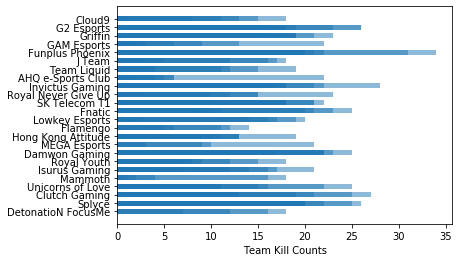

In [29]:
plt.barh(teamdf["team"], teamdf["k"],align='center', alpha=0.5, height=0.6)
plt.xlabel('Team Kill Counts')

## **Top 5 Champions**

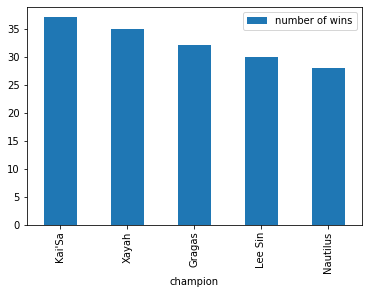

In [30]:
champwins = playersdf.loc[playersdf['result']==1].groupby('champion')['result'].count()
champwins = champwins.reset_index()
champwins.rename(columns={'result':'number of wins'},inplace=True)
champwins.sort_values(by=['number of wins'],ascending=False).head().plot("champion","number of wins", kind="bar")

In [31]:
ft = teamdf.groupby('team')['ft'].sum().nlargest(5)
print ("Top 5 First Tower killer " + str(ft))

Top 5 First Tower killer team
Funplus Phoenix    13.0
SK Telecom T1      12.0
Damwon Gaming      11.0
Splyce              9.0
Clutch Gaming       8.0
Name: ft, dtype: float64


In [32]:
ftwr = teamdf.groupby(['team','ft'])['result'].sum()
ftwr = ftwr.reset_index()
ftwr.head()

,team,ft,result
0,AHQ e-Sports Club,0.0,0.0
1,AHQ e-Sports Club,1.0,0.0
2,Cloud9,0.0,0.0
3,Cloud9,1.0,2.0
4,Clutch Gaming,0.0,0.0


In [0]:
tkw = ftwr.groupby('ft')['result'].sum()

In [34]:
tkwr = ftwr.groupby('ft')['result'].sum()[1]/(ftwr.groupby('ft')['result'].sum()[0]+ftwr.groupby('ft')['result'].sum()[1])
tkwr = round(tkwr*100,1)
print ("The team that kills the first tower will win the game by " + str(tkwr) + " %")

The team that kills the first tower will win the game by 69.7 %


In [35]:
teamdf.groupby('team')['fbaron'].sum().nlargest(5)

team
Damwon Gaming      13.0
Funplus Phoenix    13.0
Splyce             12.0
SK Telecom T1      10.0
G2 Esports          8.0
Name: fbaron, dtype: float64

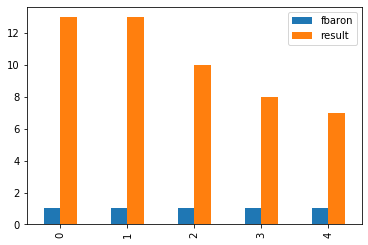

In [36]:
fbwr = teamdf.groupby(['team','fbaron'])['result'].sum().nlargest(5)
fbwr = fbwr.reset_index()
fbwr.head().plot(kind="bar")

In [0]:
fbw = fbwr.groupby('fbaron')['result'].sum()

In [0]:
fbwr = teamdf.groupby(['team','fbaron'])['result'].sum()
fbwr = fbwr.reset_index()
bkr = fbwr.groupby('fbaron')['result'].sum()

In [0]:
bkwr = bkr[1]/(bkr[0]+bkr[1])

In [40]:
bkwr = round(bkwr*100,1)
print ("The team that kills the first baron will win the game by " + str(bkwr) + " %")

The team that kills the first baron will win the game by 87.8 %


In [41]:
print (" Top 5 players who did most damage to champs")

 Top 5 players who did most damage to champs


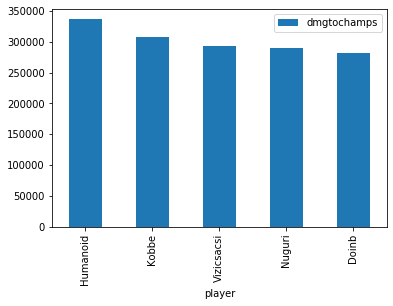

In [42]:
playersdf.groupby('player')['dmgtochamps'].sum().nlargest(5).plot(kind="bar", legend=True)